In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from allison.nn.layers import LayerDense
from allison.nn.models import NeuralNetwork
from allison.utils.functions.data import train_test_split
from allison.utils.functions.activation import sigmoid,softmax,tanh,relu
from allison.utils.metrics import accuracy
from allison.utils.functions.transforms import get_numeric_labels
from allison.utils.functions.loss import binary_cross_entropy
from allison.optimizers.sgd import SGD,SGDMomentum

Dataset

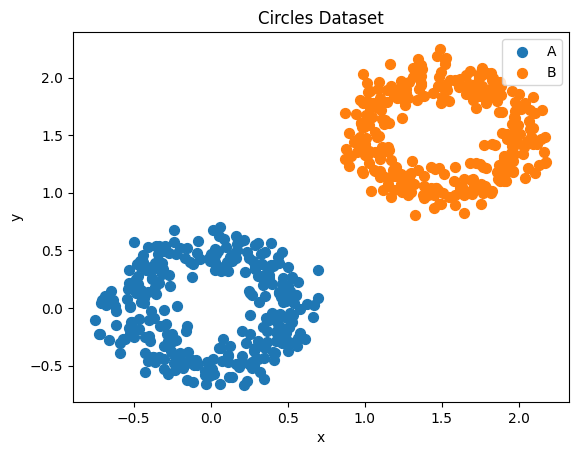

In [2]:
n=300

r1=0.5
r2=0.5
thetas = np.linspace(0,2*np.pi,n)

x1=r1*np.cos(thetas) + 0.1*np.random.randn(n)
y1=r1*np.sin(thetas) + 0.1*np.random.randn(n)

x2=1.5+r2*np.cos(thetas) + 0.1*np.random.randn(n)
y2=1.5+r2*np.sin(thetas) + 0.1*np.random.randn(n)

plt.scatter(x1,y1,s=50,label="A")
plt.scatter(x2,y2,s=50,label="B")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Circles Dataset")
plt.legend()

In [3]:
x=x1.tolist()+x2.tolist()
y=y1.tolist()+y2.tolist()
labels = [1 for x in x1.tolist()] + [0 for x in x2.tolist()]
df=pd.DataFrame({
    "x":x,
    "y":y,
    "labels":labels
})
df.head()

,x,y,labels
0,0.447203,-0.054619,1
1,0.458591,0.099686,1
2,0.541542,0.040364,1
3,0.551489,0.110955,1
4,0.523357,0.085415,1


# Preprocess

Split data for train and test

In [4]:
data_train, data_test = train_test_split(df,test_size=0.2)
features = ["x", "y"]
labels = "labels"

X_train = data_train[features].to_numpy()
Y_train=data_train[labels].to_numpy(int)
print(X_train.shape,Y_train.shape)

X_test = data_test[features].to_numpy()
Y_test=data_test[labels].to_numpy(int)
print(X_test.shape,Y_test.shape)

(480, 2) (480,)
(120, 2) (120,)


# Train

In [ ]:
model = NeuralNetwork(binary_cross_entropy,accuracy)
model.add_layer(LayerDense(2,3,sigmoid))
model.add_layer(LayerDense(3,1,sigmoid))
model.summary()

# optimizer = SGD(learning_rate=0.0000000001)
optimizer = SGDMomentum(learning_rate=0.0000000001,momentum=0.9)

Layer:1, neurons:3, input:(n,2), weights:(2,3), output:(n,3), activation:sigmoid 

Layer:2, neurons:1, input:(n,3), weights:(3,1), output:(n,1), activation:sigmoid 

Total -> Layers:2, neurons:4, weights:9, bias:4 params:13 

Loss function: binary_cross_entropy 

Metric: accuracy 



In [6]:
steps = 200
iters = 10

accuracy_train = 0
accuracy_test = 0

for step in range(1,steps+1):

    if accuracy_train > 95.0 and accuracy_test > 95.0:
        break
    
    for _ in range(iters):
        output = model.forward(X_train)
        model.backward(output,Y_train,X_train)
        optimizer.update(model)
    
    accuracy_train = model.evaluate(X_train,Y_train)
    accuracy_test = model.evaluate(X_test,Y_test)

    print(f"Step: {step:3d} Train Accuracy: {accuracy_train:7.5f}% Test Accuracy: {accuracy_test:7.5f}%")

Step:   1 Train Accuracy: 50.20833% Test Accuracy: 49.16667%
Step:   2 Train Accuracy: 50.20833% Test Accuracy: 49.16667%
Step:   3 Train Accuracy: 50.20833% Test Accuracy: 49.16667%
Step:   4 Train Accuracy: 82.70833% Test Accuracy: 82.50000%
Step:   5 Train Accuracy: 99.16667% Test Accuracy: 99.16667%


# Plot the predicted labels

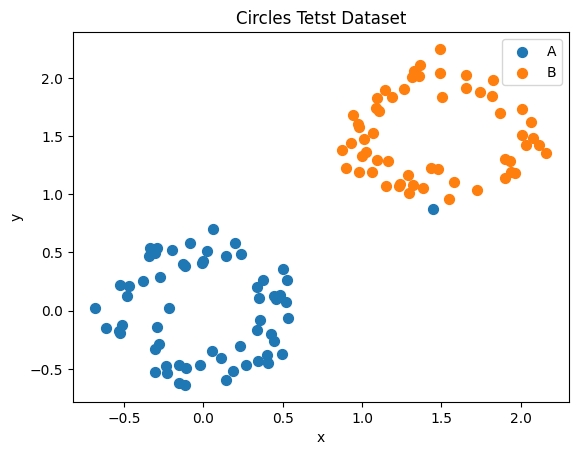

In [7]:
id2label = {0:"B",1:"A"}

data_test['prediction'] = model.predict(X_test)
data_test['pred_labels'] = data_test['prediction'].map(id2label)

for label in data_test['pred_labels'].unique():
    x = data_test[data_test['pred_labels'] == label]['x']
    y = data_test[data_test['pred_labels'] == label]['y']

    plt.scatter(x,y,s=50,label=label)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Circles Tetst Dataset")
plt.legend()